# Read in Cryptomarkets.cvs into DF

## and show some basic graphs on DF

In [167]:
import pandas as pd
import numpy as np

In [269]:
#read in crypto-markets.csv in pandas DF
df = pd.read_csv('Data/crypto-markets.csv')

df.head

ParserError: Error tokenizing data. C error: Expected 1 fields in line 47, saw 2


In [189]:
#df_clean = df.drop(columns=['slug','symbol']) will nicht!

In [190]:
#count frequency of each curreny to determine which currencys we can drop
df_grouped = df.groupby('name').size()
df_ranked = df_grouped.rank()
df_sorted = df_grouped.sort_values(ascending=False)
df_sorted

name
HempCoin                            2094
Litecoin                            1793
Bitcoin                             1793
Namecoin                            1793
Peercoin                            1792
Novacoin                            1792
Feathercoin                         1788
Terracoin                           1778
BitBar                              1765
WorldCoin                           1754
Digitalcoin                         1750
GoldCoin                            1739
Yacoin                              1737
Primecoin                           1719
Megacoin                            1718
Infinitecoin                        1710
Anoncoin                            1699
Freicoin                            1695
Ripple                              1695
Ixcoin                              1691
Bullion                             1690
Franko                              1677
Quark                               1672
Phoenixcoin                         1658
Zetacoin   

In [192]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0.0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0.0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0.0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0.0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0.0,1.292190e+09,0.3881,33.32


In [193]:
#group data by date and number of currencies traded that day
#returnes Pandas.Series
df_grouped = df.groupby('date').size()
df_grouped

date
2013-04-28       6
2013-04-29       6
2013-04-30       6
2013-05-01       6
2013-05-02       6
2013-05-03       9
2013-05-04       9
2013-05-05       9
2013-05-06       9
2013-05-07       9
2013-05-08      10
2013-05-09      11
2013-05-10      11
2013-05-11      11
2013-05-12      11
2013-05-13      11
2013-05-14      11
2013-05-15      11
2013-05-16      11
2013-05-17      11
2013-05-18      11
2013-05-19      11
2013-05-20      11
2013-05-21      11
2013-05-22      12
2013-05-23      12
2013-05-24      12
2013-05-25      12
2013-05-26      12
2013-05-27      11
              ... 
2018-02-24    1495
2018-02-25    1496
2018-02-26    1505
2018-02-27    1507
2018-02-28    1513
2018-03-01    1515
2018-03-02    1513
2018-03-03    1514
2018-03-04    1523
2018-03-05    1512
2018-03-06    1512
2018-03-07    1513
2018-03-08    1531
2018-03-09    1536
2018-03-10    1541
2018-03-11    1526
2018-03-12    1535
2018-03-13    1542
2018-03-14    1541
2018-03-15    1542
2018-03-16    1541
2018-03

In [194]:
#groupby = df.groupby('date', as_index=False).sum()
#groupby.head()

In [196]:
#set index for column 'values'
#returns DataFrame
df_groupedDF = df_grouped.reset_index(name='values')
df_groupedDF

,date,values
0,2013-04-28,6
1,2013-04-29,6
2,2013-04-30,6
3,2013-05-01,6
4,2013-05-02,6
5,2013-05-03,9
6,2013-05-04,9
7,2013-05-05,9
8,2013-05-06,9
9,2013-05-07,9


In [260]:
#create pyplot showing number of currencies traded each day 

from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go 

trace0 = go.Scatter(
    x= df_groupedDF['date'], 
    y= df_groupedDF['values'],
    name='density',
    mode = 'lines',
    line = dict(
        color = ('rgb(51,204,51)'),
        width = 1)
       
    

)

data = [trace0]
layout = go.Layout(
    title='Crypto-Währungen',
    yaxis={
        'title': 'handelbare Währungen',
        'nticks': 10,
        
    },
    yaxis2={
        'title': 'Zeit',
        'nticks': 10,
    }
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='cryto-overview')

In [312]:
#Dichte Diagramm -> Wie viele Tage wurden die Coins überhaupt getraded?

df_density = df_grouped = df.groupby('name').size()
df_densityDF = df_density.reset_index(name='values')
df_densityDF

,name,values
0,0x,222
1,1World,5
2,2GIVE,679
3,300 Token,243
4,42-coin,1517
5,808Coin,608
6,8Bit,1072
7,ACChain,44
8,AI Doctor,75
9,AICHAIN,69


In [357]:
#Dichte Diagramm -> Wie viele Tage wurden die Coins überhaupt getraded?

import plotly.offline as py
import plotly.graph_objs as go
import numpy as np

trace0 = go.Histogram(
    x=df_densityDF['values'],
    xbins=dict(
        size = 50), #das will noch nicht!!
    marker=dict(
        color=('rgb(51,204,51)'),
    ),
    opacity=0.80
)
  
data = [trace0]

layout = go.Layout(
    title='Sampled Results',
    xaxis=dict(
        title='Value'
    ),
    yaxis=dict(
        title='Count'
    ),
    bargap=0.2,
    bargroupgap=0.1
    )

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='density')

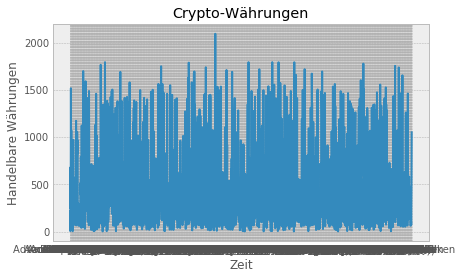

In [302]:
#alter Versuch, dass da was geht.
import matplotlib.pyplot as plt

%matplotlib inline

plt.title("Crypto-Währungen")
plt.ylabel('Handelbare Währungen')
plt.xlabel('Zeit')
plt.style.use('bmh')
plt.plot(df_grouped)
plt.show()